<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/transformers_with_tensorflow_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TENSORFLOW_HUB
Watch this video https://www.youtube.com/watch?v=BE5nkhFe3AE&t=55s to have an overview of TENSORFLOW_HUB.<br><br>
TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code. Follow the link https://www.tensorflow.org/hub to access the  tensorflow_hub website.<br><br>

To have access to the machine learning models stored in this hub go to https://tfhub.dev/. The models in tensorflow_hub are classified into several categories depending of the problems they can handle:
* Text Problem Domains
* Image Problem Domains
* Video Problem Domains
* Audio Problem Domains

For exemple, if we want to have access to a video-audio-text model we go here https://tfhub.dev/s?module-type=video-audio-text. After that, if we choose the mmv/tsm-resnet50 model we go https://tfhub.dev/deepmind/mmv/tsm-resnet50/1. In the above code we download the model in training mode.

In [ ]:
#import tensorflow as tf
#print(tf.__version__)
#!pip install -U tensorflow-text==2.6.0 
#!pip install -U tensorflow-text==tf.__version__
#tf.__version__
!pip install -U tensorflow-text==2.6.0 

In [ ]:
import numpy as np
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow.compat.v2 as tf

module = hub.load("https://tfhub.dev/deepmind/mmv/tsm-resnet50/1", tags={"train"})

# BERT MODELS IN TENSORFLOW_HUB
TENSORFLOW_HUB provide a wide range of text-mining pre-trained model such as BERT. BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture. TENSORFLOW_HUB store several BERT models (https://tfhub.dev/google/collections/bert/1). Each BERT model in tf_hub has an associated preprocessing in tf_hub for use with it.<br><br>

All the associated preprocess models take into account the begining and the end of a sentence. When a model prepoces a sentence like "I like tensorflow", it changes it into "CLS I love tensorflow SEP". It means, there are some specials tokens for the:
* the begining of a sentence
* the end of a sentence
* unknowns words
*....

**BERT UNCASED WITH 12 ENCODERS**<br>
https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4 is a BERT model designed for uncased text with 12 encoders. This model has been pre-trained for English on the Wikipedia and BooksCorpus. The preprocessing for use with it is https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3.<br> All parameters in the module are trainable, and fine-tuning all parameters is the recommended practice. Now, we show how to import this model in python as tensorflow.keras.layers objects:

In [ ]:
#!pip install -U tensorflow-text==2.6.0   print(tf.__version__)
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as text

preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",trainable=True)

encoder(preprocessor(text_sample)) in the above code returns a dictionary of tf.Tensor np.array objects. The corresponding keys of dictionary are:
 * 'default'
 * 'pooled_output'
 * 'encoder_outputs'
 
The 'pooled_output' key stores the embedding vectors of each sentences of our corpus. In the context of this notebook, we are mainly  interested in 'pooled_output'.

In [ ]:
text_sample = ['it is a tensorflow_hub presentation','use bert using pre-trained model from tensorflow']
encoder(preprocessor(text_sample))

In [ ]:
encoder(preprocessor(text_sample))['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.835711  , -0.26990077, -0.21665962, ..., -0.23853494,
        -0.5519091 ,  0.81152356],
       [-0.8952712 , -0.49025884, -0.89983445, ..., -0.8330912 ,
        -0.6336721 ,  0.82871586]], dtype=float32)>

**BERT CASED WITH 24 ENCODERS**<br>
https://tfhub.dev/tensorflow/bert_en_cased_L-24_H-1024_A-16/4 a BERT model designed for uncased text with 24 encoders. This model has been pre-trained for English on the Wikipedia and BooksCorpus. The preprocessing for use with it is https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3.<br>
All parameters in the module are trainable, and fine-tuning all parameters is the recommended practice.Now, we show how to import this model in python as tensorflow.keras.layers objects and to use it to get embedding vectors of sentences:

In [ ]:
#!pip install -U tensorflow-text==2.6.0
#print(tf.__version__)
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as text

preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_cased_L-24_H-1024_A-16/4",trainable=True)

text_sample = ['it is a tensorflow_hub presentation','use bert using pre-trained model from tensorflow']
encoder(preprocessor(text_sample))['pooled_output']

<tf.Tensor: shape=(2, 1024), dtype=float32, numpy=
array([[ 0.9964297 ,  0.83808947,  0.9222261 , ..., -0.9872135 ,
        -0.73264426,  0.9662131 ],
       [ 0.994999  ,  0.8786669 ,  0.9259143 , ..., -0.98835206,
        -0.72122973,  0.9567243 ]], dtype=float32)>

# Mail classification with BERT
This part is largely inspired by this video https://www.youtube.com/watch?v=hOCDJyZ6quA&t=3s.<br>
The following link is a tutorial about bert implementation with tf-hub https://www.tensorflow.org/text/tutorials/classify_text_with_bert?hl=fr<br><br>
In this section, we build a BERT model to detect the spams. Run the above cell to import the email dataset. We have 2 columns in this dataset. The email column is email text. The label column is equal to 1 for the valid emails and to 1 for the spams. In the above cell, we provide some functions for preprossesing text data.

In [ ]:
import re


def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

def _remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def _remove_emails(x):
    return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

In [ ]:
import pandas as pd
spam_ham = pd.read_csv("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/spam_ornot_spam.csv")
spam_ham['email'] = spam_ham['email'].apply(lambda x:remove_html(str(x)))
spam_ham['email'] = spam_ham['email'].apply(lambda x:_remove_urls(str(x)))
spam_ham['email'] = spam_ham['email'].apply(lambda x:_remove_emails(str(x)))
spam_ham.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
spam_ham.groupby('label').describe()

We make the dataset more balanced:

In [ ]:
df_spam = spam_ham.loc[spam_ham['label']==1]
df_ham = spam_ham.loc[spam_ham['label']==0]

df_ham_down_sample = df_ham.sample(1500)

spam_ham_more_balanced = pd.concat([df_spam,df_ham_down_sample])
spam_ham_more_balanced['label'].value_counts()

0    1500
1     500
Name: label, dtype: int64

We split spam_ham_more_balanced into train set and test set. Y is the target value. We notice we use the stratify option when we split the dataset.

In [ ]:
Y= spam_ham_more_balanced['label']
X = spam_ham_more_balanced['email']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, stratify=Y,random_state=42)

## We create the preprocess and encoder model
* The url for encoder : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4
* the url for preprocess model : https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3

These 2 URLs correspond to 2 pre-trained models we can download from tensorflow_hub. You see on https://tfhub.dev/google/collections/bert/1 that BERT encoder and preprocessing have to be paired. Run the cell below to dowload these models. In the code below, We can consider bert_preprocess_model and bert_model as tensorflow.keras.layers objects.

In [ ]:
#!pip install -U tensorflow-text==2.6.0
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

#We can consider bert_preprocess_model and bert_model as tensorflow.keras.layers objects.
bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',trainable=False)


#bert_results = bert_model(text_preprocessed)

## Model implementation
In this part we design a model to predict if a mail is spam or not. We make the model with the functional way. Remind that bert_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',trainable=True) return a dictionary of vectors and we're just interressed in  bert_model['pooled_output']. bert_model['pooled_output'] is a set of embedding vectors of the corpus sentences.<br><br>
Since we have a binary classification, the out_put layer has a sigmoid activation function. <br><br>
So far we implement the models in the sequential way. This time, we do it with the functional way.

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model

import tensorflow as tf
#BERT LAYERS
text_input = Input(shape=(),dtype=tf.string,name='text')
preprocess = bert_preprocess_model(text_input)
outputs = bert_model(preprocess)
net = outputs['pooled_output']

#NN LAYERS
net = Dropout(0.1,name="dropout")(net)
output_layer = Dense(1,activation='sigmoid',name='output_layer')(net)

BERT_MODEL = Model(inputs=[text_input],outputs=[output_layer])

The parameters from bert_preprocess_model and bert_model are pretrained. If we want to make those parameters trainables we have to set trainable=True. <br>
bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', trainable=True, name='BERT_encoder'). <br>
Model.summary gives us some relevant information about the model such that: the trainable parameters, the parameters per layers.

In [ ]:
BERT_MODEL.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer_4 (KerasLayer)      {'input_mask': (None 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_5 (KerasLayer)      {'sequence_output':  109482241   keras_layer_4[0][0]              
                                                                 keras_layer_4[0][1]              
                                                                 keras_layer_4[0][2]              
______________________________________________________________________________________________

Since we have a binary classification we choose binary_crossentropy loss function. Now, we train on imbalanced dataset then we should not rely on accuracy to evaluate our model. We evaluate the model with several metrics.

In [ ]:
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

METRICS = [BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall')]
BERT_MODEL.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In the cell bellow, we run the training stage of the model with 20 epochs.

In [ ]:
BERT_MODEL.fit(X_train, y_train,epochs=20)

In [ ]:
BERT_MODEL.evaluate(X_test,y_test)

13/13 [==============================] - 9s 583ms/step - loss: 0.3465 - accuracy: 0.8875 - precision: 0.8767 - recall: 0.6400


[0.3465215265750885, 0.887499988079071, 0.8767123222351074, 0.6399999856948853]

## Confusion Matrix
We call the model we've just trained to comput y_pred. After, we compute the confusion matrix with sklearn and we draw it.

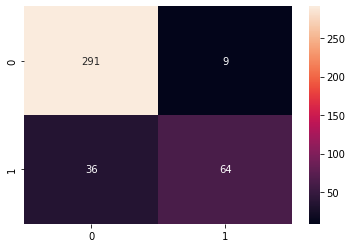

In [ ]:
import numpy as np
y_pred = BERT_MODEL.predict(X_test).flatten()
y_pred = np.where(y_pred>0.5,1,0)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')

## We test the model with text that seem to be spam

In [ ]:
new_mail = ['You are awarded an IPHONE. Call 0906 from. Delevery within 28 days']
pred_mail = BERT_MODEL.predict(new_mail)

if pred_mail[0]>0.5:
    print("the model predict a spam for the new mail: " +str(pred_mail[0]))

the model predict a spam for the new mail: [0.6107131]


# Exercise : text topic prediction
The goal here is make a model to predict the subject of text from a news dataset. We'll make the model with pre-trained models from tensorflow_hub. Run the cell below to get the dataset the topic_news. You work with topic_news dataset in this exercise.

In [ ]:
import pandas as pd
import numpy as np

Fake = pd.read_parquet("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/Fake.parquet.brotli")
Real = pd.read_parquet("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/Real.parquet.brotli")

Fake = Fake.loc[~(Fake['text'].str.strip().str.len()==0)]
Real = Real.loc[~(Real['text'].str.strip().str.len()==0)]

Real['text'] = Real['title']+ " " +Real['text']
Fake['text'] = Fake['title']+ " " +Fake['text']


Real = Real[['subject','text']]
Fake = Fake[['subject','text']]

topic_news = pd.concat([Real,Fake])

topic_news = topic_news.loc[topic_news['subject'].isin(['politicsNews','worldnews','News','politics'])]
topic_news['subject'] = np.where(topic_news['subject'].isin(['politicsNews','politics']),\
                                 'politics',topic_news['subject'])


topic_news.head()

,subject,text
0,politics,"As U.S. budget fight looms, Republicans flip t..."
1,politics,U.S. military to accept transgender recruits o...
2,politics,Senior U.S. Republican senator: 'Let Mr. Muell...
3,politics,FBI Russia probe helped by Australian diplomat...
4,politics,Trump wants Postal Service to charge 'much mor...


1) Create an encoder from tensorflow_hub such that:

* the URL for the encoder is : https://tfhub.dev/google/experts/bert/pubmed/squad2/2
* the URL for the preprocess is : https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3

The encoder and preprocess you create should be load as as tensorflow.keras.layers objects. What are the training/fine-tuned datasets used for the pretraining of this model?

In [ ]:
#your code here
#!pip install -U tensorflow-text==2.6.0
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert = hub.KerasLayer('https://tfhub.dev/google/experts/bert/pubmed/squad2/2')

2) Encode the subject column of topic_news with sklearn.preprocessing.LabelEncoder. The name of the encoded column should be class

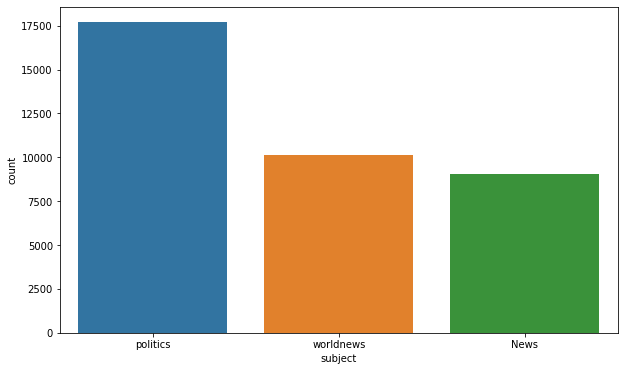

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(topic_news['subject'].unique())
topic_news['class'] = le.transform(topic_news['subject'])
topic_news['class']
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=topic_news)

3) The encoder and preprocess you created at the first question take text without URL, email, and HTML as input. Remove URL, email, and HTML from the text column.

In [ ]:
#your code here: We first remove the HTML tags. Complete the code
topic_news['text'] = topic_news['text'].apply(lambda x:remove_html(str(x)))
topic_news['text'] = topic_news['text'].apply(lambda x:_remove_urls(str(x)))
topic_news['text'] = topic_news['text'].apply(lambda x:_remove_emails(str(x)))

4) Split topic_news into a training dataset and a test dataset using sklearn.model_selection train_test_split with test_size=0.2. You have to apply to_categorical to your target values Y with a num_classes=3.

In [ ]:
#Your code here
from tensorflow.keras.utils import to_categorical
Y= topic_news['class']
X = topic_news['text']

Y = to_categorical(Y,num_classes=3)

#Convert 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, stratify=Y,random_state=42)

5) The goal here is to implement a BERT model using the encoder and preprocess you built in the first question. Remind that 
* the encoder returns a dictionary of 3 vectors
* we use the 'pooled_output' vectors 
* the 'pooled_output' vectors are embedding vectors of the input sentences

Build a neural network to predict the subject of the text. Compile your model with the accuracy metrics and the adam optimizer.

In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
#from tensorflow.keras.utils import to_categorical

#BERT LAYERS
text_input = Input(shape=(),dtype=tf.string,name='text_input')
preprocess_bert = preprocess(text_input)
outputs = bert(preprocess_bert)
net = outputs['pooled_output']

#NN LAYERS
net = Dropout(0.1,name="dropout")(net)
output_layer = Dense(3,activation='softmax',name='output_layer')(net)

BERT_MODEL = Model(inputs=[text_input],outputs=[output_layer])

In [ ]:
BERT_MODEL.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

6) Train your model with 10 epochs. Evaluate your model over the test set.

In [ ]:
BERT_MODEL.fit(X_train,y_train,epochs=10)

Epoch 1/10
923/923 [==============================] - 584s 620ms/step - loss: 0.9519 - accuracy: 0.5322
Epoch 2/10
923/923 [==============================] - 572s 619ms/step - loss: 0.8227 - accuracy: 0.6186
Epoch 3/10
923/923 [==============================] - 571s 618ms/step - loss: 0.7738 - accuracy: 0.6451
Epoch 4/10
923/923 [==============================] - 571s 618ms/step - loss: 0.7450 - accuracy: 0.6613
Epoch 5/10
923/923 [==============================] - 566s 613ms/step - loss: 0.7316 - accuracy: 0.6668
Epoch 6/10
923/923 [==============================] - 565s 612ms/step - loss: 0.7198 - accuracy: 0.6734
Epoch 7/10
923/923 [==============================] - 566s 614ms/step - loss: 0.7143 - accuracy: 0.6751
Epoch 8/10
923/923 [==============================] - 569s 616ms/step - loss: 0.7114 - accuracy: 0.6786
Epoch 9/10
923/923 [==============================] - 568s 616ms/step - loss: 0.7054 - accuracy: 0.6799
Epoch 10/10
923/923 [==============================] - 568s 615m

In [ ]:
BERT_MODEL.evaluate(X_test,y_test)

231/231 [==============================] - 145s 622ms/step - loss: 0.6414 - accuracy: 0.7236


[0.6414135098457336, 0.7235772609710693]

7) compute a confusion matrix related to the test set. 

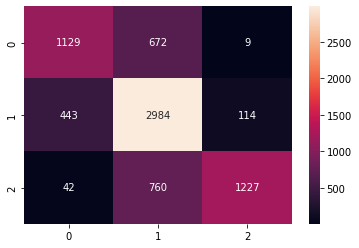

In [ ]:
from sklearn.metrics import confusion_matrix

#BERT_MODEL.predict is a probability vector
Y_pred_probability = BERT_MODEL.predict(X_test)
Y_pred = np.argmax(Y_pred_probability,axis=1)  #np.argmax give the class


y_test_class = np.argmax(y_test,axis=1) #y

cm = confusion_matrix(y_test_class,Y_pred )

import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')

8) Predict the subject of new_text with your model.

In [ ]:
new_text = ["Philippine Congress backs body cameras for police in bloody war on drugs \
The Philippine Congress approved a bill that removes a proposed 900 million pesos ($17.87 million) \
for the police war on drugs, now that police are no longer leading the operation, \
but which provides them with body cameras to record arrests. \
Senator Loren Legarda, the head of senate s finance committee, \
said on Monday that Congress re-allotted the police-requested budget\
because the Drug Enforcement Agency was now leading the controversial \
war on drugs in which thousand of suspected dealers and users have been killed.\
The bill, approved by Congress last week, is expected to be endorsed by President Rodrigo Duterte,\
who launched the crackdown, on Tuesday. Duterte this month ordered the police \
to return to the drugs war, following a near eight-week layoff, but in a supporting role only."]

In [ ]:
le.inverse_transform([np.argmax(BERT_MODEL.predict(new_text))])

array(['worldnews'], dtype=object)